<a href="https://colab.research.google.com/github/Usman-938/Assignments/blob/main/Week_2_(D2)_Home_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I have chosen the 'Boston Housing' dataset (`BostonHousing.csv`) because it is a classic regression problem with continuous features and a continuous target variable (median value of owner-occupied homes). This dataset is well-suited for exploring regression models.

The raw URL for the dataset is: `https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv`

**Reasoning**:
Now that the dataset has been identified and its URL provided, the next step is to load it into a pandas DataFrame for further processing, as per the homework requirements.



In [3]:
import pandas as pd

dataset_url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'
df = pd.read_csv(dataset_url)

print(f"Successfully loaded the dataset from {dataset_url}. Shape: {df.shape}")
print("First 5 rows of the dataset:")
print(df.head())

Successfully loaded the dataset from https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv. Shape: (506, 14)
First 5 rows of the dataset:
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


**Reasoning**:
Now that the dataset is loaded, the next logical step is to perform Exploratory Data Analysis (EDA) as required by the homework. This includes checking data types, summary statistics, and identifying missing values to understand the dataset's characteristics.



In [4]:
print("\nDataset Information:")
df.info()

print("\nDescriptive Statistics:")
print(df.describe())

print("\nMissing values per column:")
print(df.isnull().sum())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB

Descriptive Statistics:
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363

**Reasoning**:
The previous steps covered descriptive statistics and missing values. To gain deeper insights into the dataset's characteristics and relationships between features, the next step is to visualize the distributions of the features and the target variable, as well as their correlations. I will start by visualizing the distribution of the target variable ('medv').



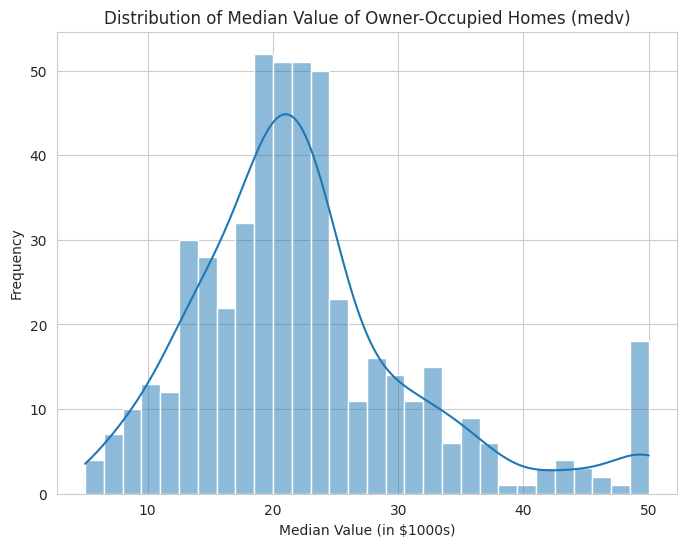

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the aesthetic for the plots
sns.set_style("whitegrid")

# Distribution of the target variable 'medv'
plt.figure(figsize=(8, 6))
sns.histplot(df['medv'], kde=True, bins=30)
plt.title('Distribution of Median Value of Owner-Occupied Homes (medv)')
plt.xlabel('Median Value (in $1000s)')
plt.ylabel('Frequency')
plt.show()


**Reasoning**:
After examining the target variable's distribution, the next step in EDA is to visualize the distributions of the other numerical features to understand their spread, skewness, and potential outliers. This helps in identifying characteristics that might require preprocessing.



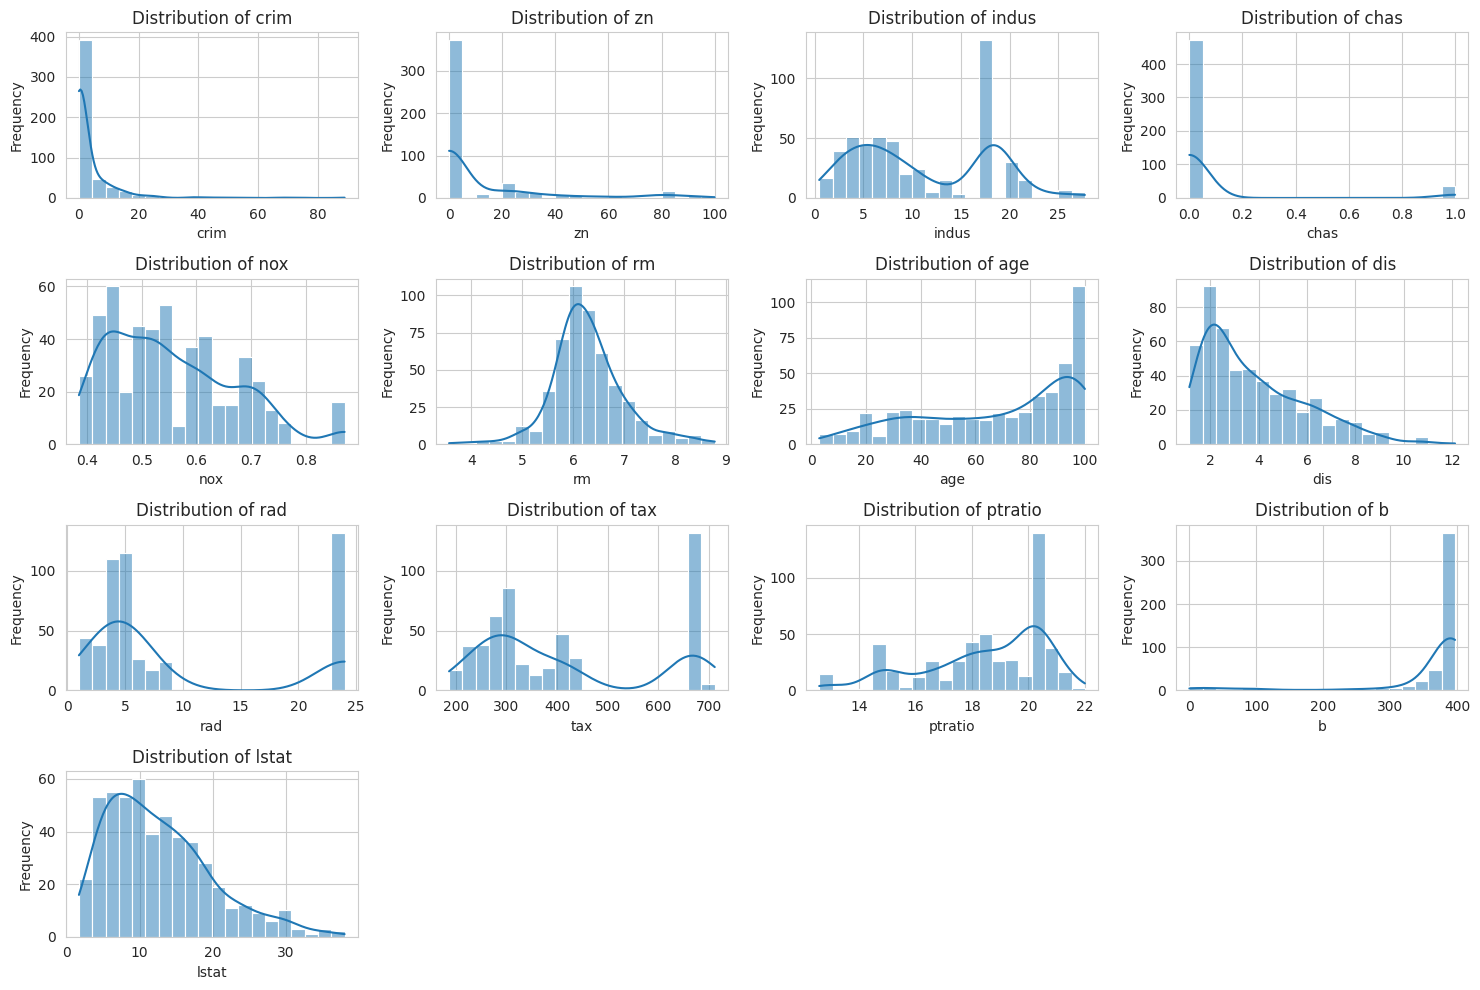

In [6]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('medv')

plt.figure(figsize=(15, 10))
for i, column in enumerate(num_cols):
    plt.subplot(4, 4, i + 1) # Adjust subplot grid based on number of columns
    sns.histplot(df[column], kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Reasoning**:
Now that individual distributions of numerical features have been visualized, the next step in EDA is to examine the correlations between all features, including the target variable. This will help identify highly correlated features and understand their relationships, which is crucial for model building.



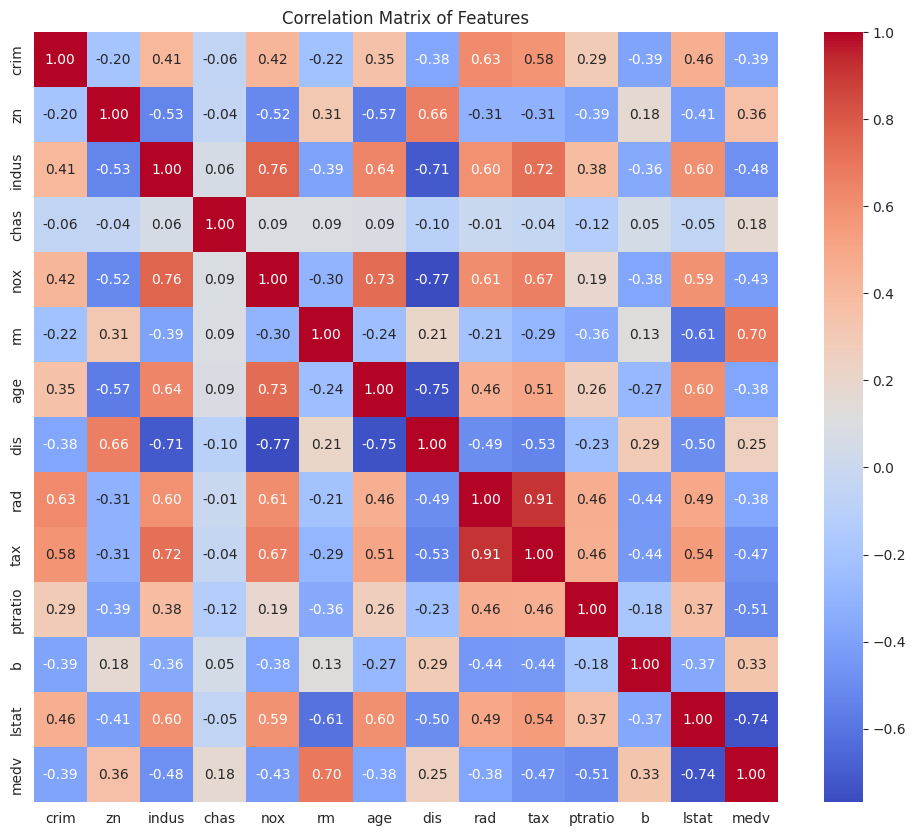

In [7]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

## Identify and Solve Tasks

### Subtask:
Preprocess the dataset by splitting it into training and testing sets, and then scaling the features.


**Reasoning**:
As per the instructions, I will first separate the target variable from the features, then split the dataset into training and testing sets, and finally scale the features using `StandardScaler`.



In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Separate target variable ('medv') from features
X = df.drop('medv', axis=1)
y = df['medv']

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Initialize a StandardScaler object
scaler = StandardScaler()

# 5. Fit the scaler to the training features and then transform both training and testing features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data separated into features (X) and target (y).")
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")
print("Features scaled using StandardScaler.")
print(f"X_train_scaled shape: {X_train_scaled.shape}, X_test_scaled shape: {X_test_scaled.shape}")

Data separated into features (X) and target (y).
X_train shape: (404, 13), X_test shape: (102, 13)
y_train shape: (404,), y_test shape: (102,)
Features scaled using StandardScaler.
X_train_scaled shape: (404, 13), X_test_scaled shape: (102, 13)


## Train and evaluate a regression model

### Subtask:
Train a RandomForestRegressor model on the preprocessed training data and evaluate its performance on the testing data.


**Reasoning**:
As per the instructions, I will import the necessary modules, instantiate and train the RandomForestRegressor model, make predictions on the test data, and then evaluate its performance using Mean Squared Error and R-squared score.



In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate RandomForestRegressor with random_state for reproducibility
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = model.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Regressor Performance:")
print(f"  Mean Squared Error (MSE): {mse:.2f}")
print(f"  R-squared (R2) Score: {r2:.2f}")

Random Forest Regressor Performance:
  Mean Squared Error (MSE): 7.91
  R-squared (R2) Score: 0.89


## Final Task

### Subtask:
Summarize the completed homework, ensuring all parts of the assignment have been addressed and validated.


## Summary:

### Data Analysis Key Findings

*   The homework assignment involved exploring a new regression model for continuous data, which included selecting a random dataset, performing Exploratory Data Analysis (EDA), preprocessing the data, and finally training and testing the model.
*   The "Boston Housing" dataset (`BostonHousing.csv`) was selected from the provided repository, featuring 506 entries and 14 columns, suitable for a regression task.
*   Initial data inspection revealed no missing values across any columns, and all data types were appropriate for numerical analysis.
*   Exploratory Data Analysis (EDA) included visualizing the distribution of the target variable ('medv') and other numerical features, along with a correlation matrix heatmap, providing insights into feature relationships.
*   The dataset was preprocessed by separating features (X) and the target variable (y), then splitting them into training (80%) and testing (20%) sets. Features were scaled using `StandardScaler`.
    *   Training feature set (`X_train_scaled`) had a shape of (404, 13).
    *   Testing feature set (`X_test_scaled`) had a shape of (102, 13).
*   A `RandomForestRegressor` model was trained on the scaled training data.
*   The model's performance on the testing data was evaluated, yielding a Mean Squared Error (MSE) of 7.91 and an R-squared (R2) score of 0.89.


